# Usage

Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tefs import TEFS
%config InlineBackend.figure_format = 'retina'

Generate some random data

In [2]:
np.random.seed(0)
n = 1000 # number of samples
m = 15   # number of features

data = {}
for i in range(1, m+1):
    data[f'x{i}'] = np.random.normal(size=n)

data['y'] = sum(data.values()) + np.random.normal(size=n)

data = pd.DataFrame(data)

Train and test split.

In [3]:
n_test = int(0.20 * n)
n_train = n - n_test
data_test = data[n_train:]
data = data[:n_train]

data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,1.764052,0.555963,-1.532921,1.593274,0.613349,0.309724,2.042536,-0.514878,0.997845,1.417079,-0.202117,0.072554,0.945508,-0.650232,-0.706413,9.175305
1,0.400157,0.892474,-1.711970,0.568722,1.843700,-0.737456,-0.919461,0.417854,0.260081,0.443729,-0.833231,-0.072568,0.422924,-1.382024,-0.302917,-0.122971
2,0.978738,-0.422315,0.046135,-0.114487,0.271091,-1.536920,0.114670,-2.048833,0.925066,-0.076973,1.733600,0.608673,-1.175680,1.354920,1.463529,1.723862
3,2.240893,0.104714,-0.958374,0.251630,1.136448,-0.562255,-0.137424,-0.989744,1.476076,-1.091534,0.190649,0.650469,-0.204851,0.208252,1.800252,4.548750
4,1.867558,0.228053,-0.080812,-1.210856,-1.738332,-1.599511,1.365527,-0.338294,-1.879252,-0.437457,-0.177810,-0.038883,0.956495,1.015896,0.465122,-1.102257


Define features and target

In [4]:
target_name = "y"
features = data.drop(columns=[target_name])
target = data[target_name]
features_names = list(features.columns)

## Configuration

Set the hyperparameters

In [5]:
k = n_train // 10 # Set k using the rule of thumb
direction = 'forward' # or 'backward'
lag_features = [0,1]
lag_target = [1]

## Run the algorithm

Perform feature selection

In [6]:
fs = TEFS(
    features=features.values,
    target=target.values,
    k=k,
    lag_features=lag_features,
    lag_target=lag_target,
    direction=direction,
    verbose=2,
    var_names=features_names,
    n_jobs=4,
)

fs.fit()

Iteration 1
Candidate Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']
Selected Features: []


TE_cumulated: 0
TE score of feature x1: 0.0065343054346751785
TE score of feature x2: 0.0038414903724176596
TE score of feature x3: 0.003600417621490785
TE score of feature x4: 0.0026015969566026255
TE score of feature x5: 0.00034785034376453444
TE score of feature x6: 0.013607666818158401
TE score of feature x7: 0.011548104377463744
TE score of feature x8: 0.011620108322237324
TE score of feature x9: 0.0020129567957008804
TE score of feature x10: 0.005302052028124017
TE score of feature x11: 0.01013801722365876
TE score of feature x12: 0.014965939550519362
TE score of feature x13: 0.006245704397464738
TE score of feature x14: 0.0056244881350151175
TE score of feature x15: -0.000731663087928912
Adding feature x12 with TE score: 0.014965939550519362
--------------------------------------------------------------------------------
Iteration 2
Candidate Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x13', 'x14', 'x15']
Selected Features: ['x12']


TE_cumulated: 0.014965939550519362
TE score of feature x1: 0.0013055562084052837
TE score of feature x2: 0.0007273187131456669
TE score of feature x3: 0.0018788736661717181
TE score of feature x4: 0.0013595643175429144
TE score of feature x5: -0.002101690377026443
TE score of feature x6: 0.00752857502500005
TE score of feature x7: 0.00871213615994593
TE score of feature x8: 0.00954510734466964
TE score of feature x9: 0.0038768124023574255
TE score of feature x10: 0.004401210370012502
TE score of feature x11: 0.005130346947198883
TE score of feature x13: 0.005544289821595133
TE score of feature x14: 0.00392067388236423
TE score of feature x15: -0.0012145039715335624
Adding feature x8 with TE score: 0.00954510734466964
--------------------------------------------------------------------------------
Iteration 3
Candidate Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x9', 'x10', 'x11', 'x13', 'x14', 'x15']
Selected Features: ['x12', 'x8']


TE_cumulated: 0.024511046895189
TE score of feature x1: 0.0012053677767031937
TE score of feature x2: 0.00035623941071031076
TE score of feature x3: 0.0024168133987764844
TE score of feature x4: -0.0012838091171882698
TE score of feature x5: -0.002833540362227178
TE score of feature x6: 0.00453555059214833
TE score of feature x7: 0.006013331790234444
TE score of feature x9: 0.0034167963934878844
TE score of feature x10: -0.0015145731350812396
TE score of feature x11: 0.0022185616410056383
TE score of feature x13: 0.0014892671743266493
TE score of feature x14: 0.0013557363382687843
TE score of feature x15: -0.0024188206931064597
Adding feature x7 with TE score: 0.006013331790234444
--------------------------------------------------------------------------------
Iteration 4
Candidate Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x9', 'x10', 'x11', 'x13', 'x14', 'x15']
Selected Features: ['x12', 'x8', 'x7']


TE_cumulated: 0.030524378685423445
TE score of feature x1: 0.0019641418378640065
TE score of feature x2: 0.000151235147966753
TE score of feature x3: 0.00011741714570180639
TE score of feature x4: -0.0016049589765018794
TE score of feature x5: -0.003006015433380735
TE score of feature x6: 0.0047719824741903685
TE score of feature x9: 0.0018890151361312876
TE score of feature x10: -0.0007014277299260997
TE score of feature x11: 0.0005701722057113029
TE score of feature x13: 0.003392254762094822
TE score of feature x14: 0.0014484566325178479
TE score of feature x15: -0.0013966791235112234
Adding feature x6 with TE score: 0.0047719824741903685
--------------------------------------------------------------------------------
Iteration 5
Candidate Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x9', 'x10', 'x11', 'x13', 'x14', 'x15']
Selected Features: ['x12', 'x8', 'x7', 'x6']


TE_cumulated: 0.035296361159613814
TE score of feature x1: 0.002422959100210169
TE score of feature x2: 0.000552941391431
TE score of feature x3: -0.000204567344424679
TE score of feature x4: -0.0021070320682834535
TE score of feature x5: -0.0021681724113668324
TE score of feature x9: 0.0013040213411754237
TE score of feature x10: -0.0011811026876590372
TE score of feature x11: 0.0009546641299241695
TE score of feature x13: 0.0029839892527172285
TE score of feature x14: 0.00023475224576745973
TE score of feature x15: -0.000943254940896858
Adding feature x13 with TE score: 0.0029839892527172285
--------------------------------------------------------------------------------
Iteration 6
Candidate Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x9', 'x10', 'x11', 'x14', 'x15']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13']


TE_cumulated: 0.03828035041233104
TE score of feature x1: 0.0029508553356178066
TE score of feature x2: -0.0010669613419275192
TE score of feature x3: -0.0009411416090847544
TE score of feature x4: -0.003598460609641349
TE score of feature x5: -0.00242318137004819
TE score of feature x9: 0.0014014304136280298
TE score of feature x10: -0.0018315251587687834
TE score of feature x11: -0.0003283145276398794
TE score of feature x14: 1.8346431141666453e-05
TE score of feature x15: 2.517457590234945e-05
Adding feature x1 with TE score: 0.0029508553356178066
--------------------------------------------------------------------------------
Iteration 7
Candidate Features: ['x2', 'x3', 'x4', 'x5', 'x9', 'x10', 'x11', 'x14', 'x15']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1']


TE_cumulated: 0.04123120574794885
TE score of feature x2: -0.0004317197190388186
TE score of feature x3: -0.000989337006028726
TE score of feature x4: -0.002818935999085989
TE score of feature x5: -0.001945420044181627
TE score of feature x9: 0.00217508096071857
TE score of feature x10: -0.00019687425782340118
TE score of feature x11: 0.0012217823281885157
TE score of feature x14: 0.0017176418533329865
TE score of feature x15: 0.0009231477290766385
Adding feature x9 with TE score: 0.00217508096071857
--------------------------------------------------------------------------------
Iteration 8
Candidate Features: ['x2', 'x3', 'x4', 'x5', 'x10', 'x11', 'x14', 'x15']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9']


TE_cumulated: 0.04340628670866742
TE score of feature x2: -0.00032332645243728086
TE score of feature x3: -0.0008139213269566098
TE score of feature x4: -0.0023738620335060356
TE score of feature x5: -0.002364048638271256
TE score of feature x10: -0.00021012032071420633
TE score of feature x11: 0.0021241785305713273
TE score of feature x14: 0.001492418984884017
TE score of feature x15: 0.0009081463554722127
Adding feature x11 with TE score: 0.0021241785305713273
--------------------------------------------------------------------------------
Iteration 9
Candidate Features: ['x2', 'x3', 'x4', 'x5', 'x10', 'x14', 'x15']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9', 'x11']


TE_cumulated: 0.045530465239238746
TE score of feature x2: -0.0017278931015610247
TE score of feature x3: -0.0019065916282272957
TE score of feature x4: -0.0030349221509298682
TE score of feature x5: -0.003052054470434294
TE score of feature x10: -0.0018984331957644165
TE score of feature x14: 0.0007848456002002291
TE score of feature x15: -0.000625888163016633
Adding feature x14 with TE score: 0.0007848456002002291
--------------------------------------------------------------------------------
Iteration 10
Candidate Features: ['x2', 'x3', 'x4', 'x5', 'x10', 'x15']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9', 'x11', 'x14']


TE_cumulated: 0.046315310839438975
TE score of feature x2: -0.001289481946337545
TE score of feature x3: -0.0005090018753193676
TE score of feature x4: -0.0028239963633098636
TE score of feature x5: -0.0020623971802022703
TE score of feature x10: -0.0016601316187055681
TE score of feature x15: 0.0005793705387971484
Adding feature x15 with TE score: 0.0005793705387971484
--------------------------------------------------------------------------------
Iteration 11
Candidate Features: ['x2', 'x3', 'x4', 'x5', 'x10']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9', 'x11', 'x14', 'x15']


TE_cumulated: 0.046894681378236124
TE score of feature x2: -0.0004953859211299094
TE score of feature x3: -0.0004593516555541771
TE score of feature x4: -0.0019690749398206947
TE score of feature x5: -0.0020380422483286045
TE score of feature x10: -0.0005852975309524749
Adding feature x3 with TE score: -0.0004593516555541771
--------------------------------------------------------------------------------
Iteration 12
Candidate Features: ['x2', 'x4', 'x5', 'x10']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9', 'x11', 'x14', 'x15', 'x3']


TE_cumulated: 0.046894681378236124
TE score of feature x2: 2.907300225480497e-05
TE score of feature x4: -0.002354976576440987
TE score of feature x5: -0.002808249327202285
TE score of feature x10: -0.0004694206739707177
Adding feature x2 with TE score: 2.907300225480497e-05
--------------------------------------------------------------------------------
Iteration 13
Candidate Features: ['x4', 'x5', 'x10']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9', 'x11', 'x14', 'x15', 'x3', 'x2']


TE_cumulated: 0.04692375438049093
TE score of feature x4: -0.00327343234643572
TE score of feature x5: -0.0032445023144182447
TE score of feature x10: -0.00036744104399127897
Adding feature x10 with TE score: -0.00036744104399127897
--------------------------------------------------------------------------------
Iteration 14
Candidate Features: ['x4', 'x5']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9', 'x11', 'x14', 'x15', 'x3', 'x2', 'x10']


TE_cumulated: 0.04692375438049093
TE score of feature x4: -0.002263935277169775
TE score of feature x5: -0.002410841634892198
Adding feature x4 with TE score: -0.002263935277169775
--------------------------------------------------------------------------------
Iteration 15
Candidate Features: ['x5']
Selected Features: ['x12', 'x8', 'x7', 'x6', 'x13', 'x1', 'x9', 'x11', 'x14', 'x15', 'x3', 'x2', 'x10', 'x4']


TE_cumulated: 0.04692375438049093
TE score of feature x5: -0.0012547866025623827
Adding feature x5 with TE score: -0.0012547866025623827
--------------------------------------------------------------------------------


## Inspect the results

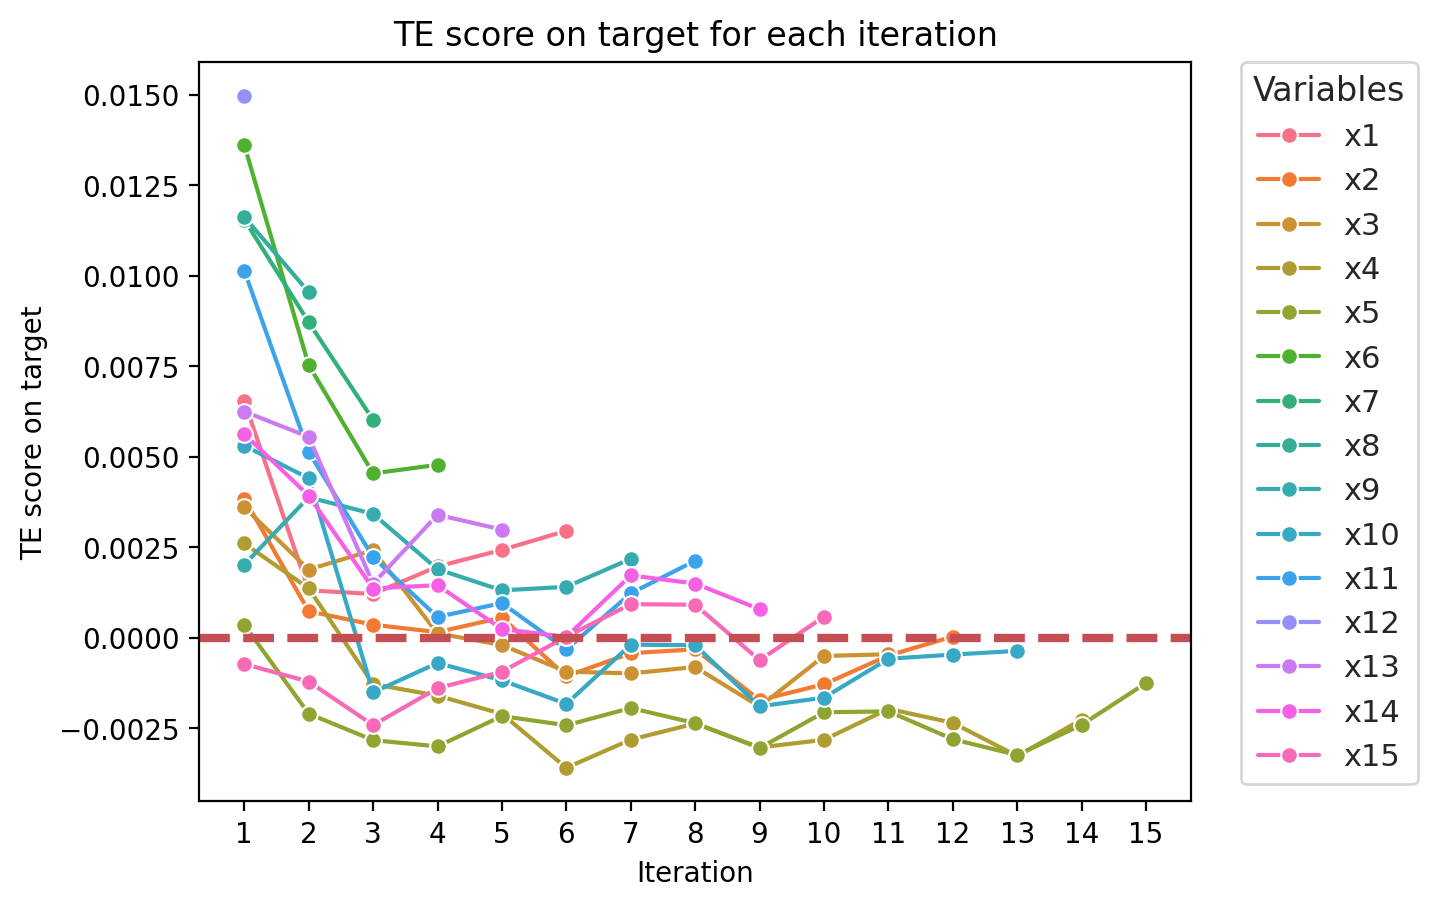

In [7]:
fig, ax = plt.subplots()
fs.plot_te_results(ax=ax)
plt.show()

Select features based on threshold

In [8]:
selected_features = fs.select_features(threshold=np.inf)
n_features_selected_with_threshold = len(selected_features)
selected_features

Stopping condition reached: all feature scores are negative


['x1', 'x6', 'x7', 'x8', 'x9', 'x11', 'x12', 'x13', 'x14', 'x15']

Select specific number of features

In [9]:
selected_features = fs.select_n_features(n=4)
selected_features

['x12', 'x6', 'x7', 'x8']

## Wrapper analysis

In [10]:
from tefs.metrics import regression_analysis
from sklearn.model_selection import TimeSeriesSplit

num_total_features = features.shape[1]
scores = []
scores_cv = []
unified_df = pd.concat([data, data_test], axis=0).reset_index(drop=True)
n_samples = unified_df.shape[0]
n_splits = 5
# Fixed-size rolling window
cv_scheme = TimeSeriesSplit(
    n_splits=n_splits,
    max_train_size=n_samples // (n_splits + 1),
)

for n_features in range(0, num_total_features+1):

    selected_features = fs.select_n_features(n=n_features)
    inputs_names_lags = {feature: lag_features for feature in selected_features}
    inputs_names_lags[target_name] = lag_target

    # Train-test scores
    scores.append(regression_analysis(
        inputs_names_lags=inputs_names_lags,
        target_name=target_name,
        df_train=data,
        df_test=data_test,
    ))

    # Cross-validation scores
    scores_cv.append(regression_analysis(
        inputs_names_lags=inputs_names_lags,
        target_name=target_name,
        df=unified_df,
        cv_scheme=cv_scheme,
    ))

scores = np.array(scores)
scores_cv = np.array(scores_cv)

### With train and test split

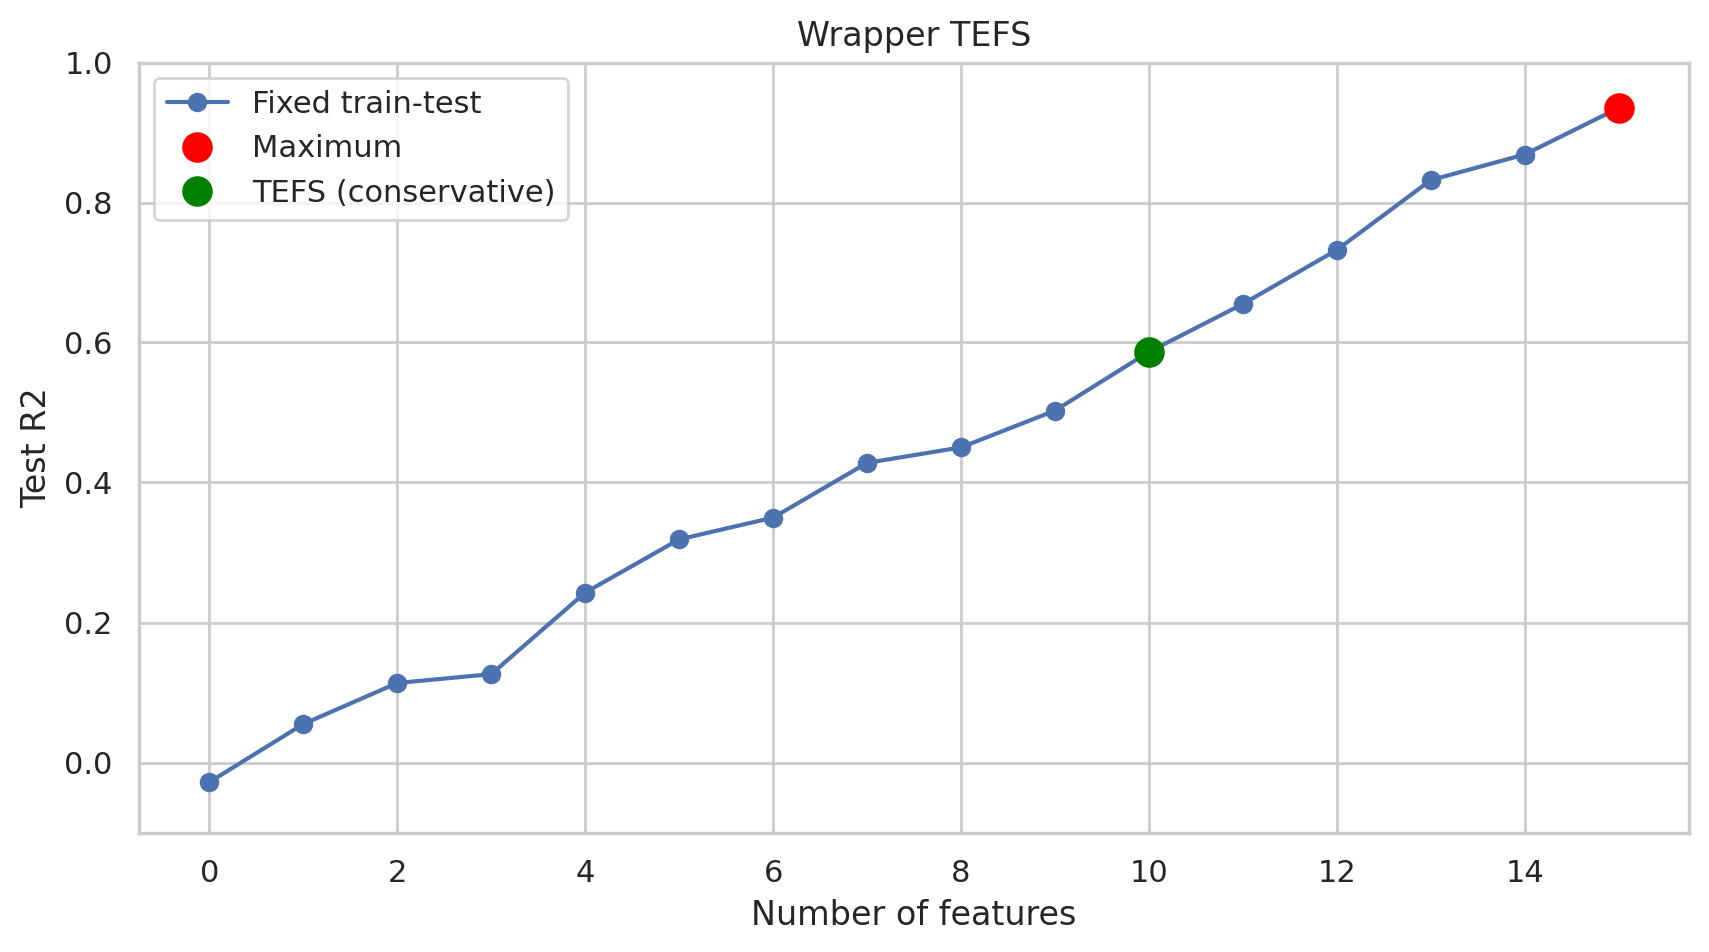

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(scores, marker="o", label="Fixed train-test")
maxima = np.where(scores == scores.max())[0]
ax.plot(maxima, scores[maxima], marker="o", color="red", linestyle="None", label="Maximum", markersize=10)
ax.plot(n_features_selected_with_threshold, scores[n_features_selected_with_threshold], marker="o", color="green", linestyle="None", label="TEFS (conservative)", markersize=10)

ax.legend()

ax.set_xlabel("Number of features")
ax.set_ylabel("Test R2")
ax.set_title("Wrapper TEFS")
step = 2
ax.set_xticks(range(0, num_total_features+1, step))
ax.set_xticklabels(range(0, num_total_features+1, step))
ax.set_ylim(-0.1, 1)
ax.grid(visible=True)

plt.show()

### With cross-validation

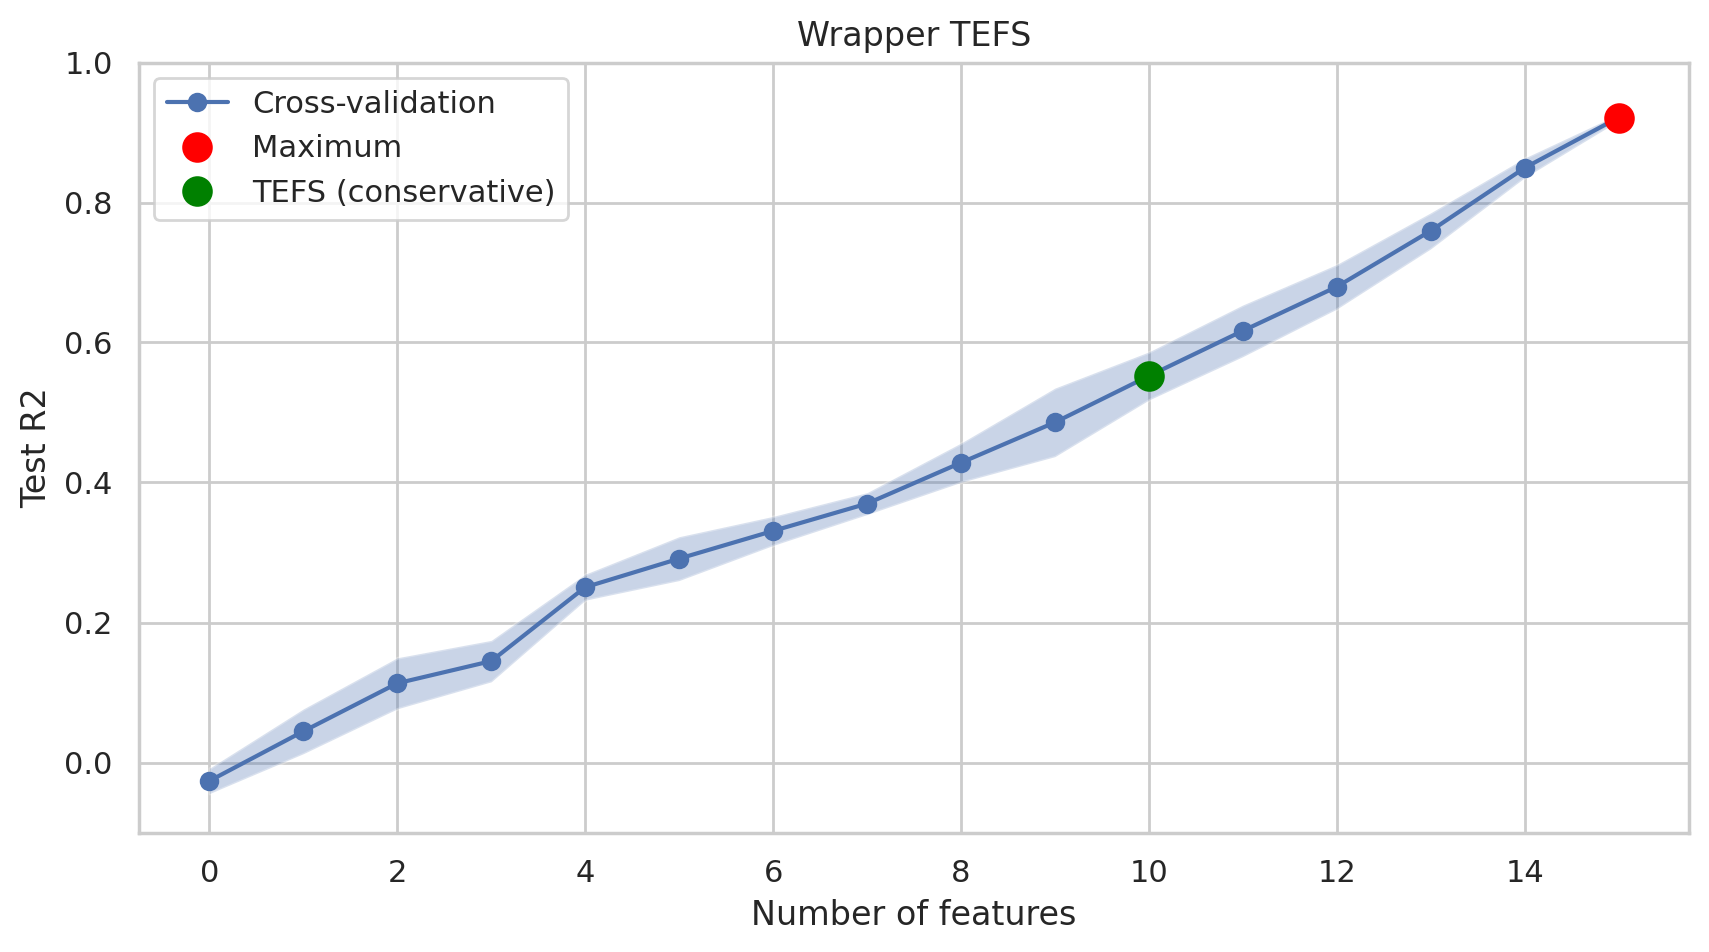

In [12]:
import scipy.stats

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(scores_cv.mean(axis=1), marker="o", label="Cross-validation")
maxima = np.where(scores_cv.mean(axis=1) == scores_cv.mean(axis=1).max())[0]
ax.plot(maxima, scores_cv.mean(axis=1)[maxima], marker="o", color="red", linestyle="None", label="Maximum", markersize=10)
ax.plot(n_features_selected_with_threshold, scores_cv.mean(axis=1)[n_features_selected_with_threshold], marker="o", color="green", linestyle="None", label="TEFS (conservative)", markersize=10)

ax.legend()

# plot confidence interval bands from cross-validation based on mean and standard deviation (90% confidence)
alpha = 0.1
quantile = scipy.stats.norm.ppf(1-alpha/2)
ax.fill_between(
    range(scores_cv.shape[0]),
    scores_cv.mean(axis=1) - scores_cv.std(axis=1) * quantile / np.sqrt(scores_cv.shape[1]),
    scores_cv.mean(axis=1) + scores_cv.std(axis=1) * quantile / np.sqrt(scores_cv.shape[1]),
    alpha=0.3
)

ax.set_xlabel("Number of features")
ax.set_ylabel("Test R2")
ax.set_title("Wrapper TEFS")
step = 2
ax.set_xticks(range(0, num_total_features+1, step))
ax.set_xticklabels(range(0, num_total_features+1, step))
ax.set_ylim(-0.1, 1)
ax.grid(visible=True)

plt.show()